## This will be used to analyze the reversal data

In [1]:
import pandas as pd 

import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# regular GLMs
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf
%config Completer.use_jedi = False


In [2]:
output_dir = '/gpfs/gibbs/pi/levy_ifat/Or/RV_FC'

In [3]:
# get difumo's labels
labels = pd.read_csv('/gpfs/gibbs/pi/levy_ifat/Or/DiFuMo_atlas/256/labels_256_dictionary.csv')

In [4]:
tsFiles =  glob.glob((os.path.join(output_dir, 'timeSeries','sub*.npy')))
ts_total57 = [] # the 570 timeseries
ts_total55 = [] # the 555
ts_total51 = [] # the 514
sub51 = []
sub55 = []
sub57 = []
for f in tsFiles:
    ts = np.load(f)
    sub = os.path.basename(f).split('_')[0]
    if ts.shape[0] > 545:
        # z-score
        t = ts[:548]
        tz = scipy.stats.zscore(t, axis=0)
        # append
        ts_total55.append(tz)
        sub55.append(sub)

    else:
        ts_total51.append(ts[2:])
        sub51.append(sub)
            

In [5]:
# remove items and subejcts
for i in range(len(ts_total55)):
    if ts_total55[i].shape[0] < 545:
        #print(i)
        #print(ts_total55[i].shape)
        sub55.pop(i)
        ts_total55.pop(i)
        
        
print(np.array(ts_total57).shape)
print(np.array(ts_total51).shape)
print(np.array(ts_total55).shape)        

(0,)
(24,)
(89, 548, 256)


/tmp/ipykernel_22149/3254487080.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(ts_total51).shape)


In [ ]:
#%matplotlib notebook # this will allow us to use interactive zoom 
# plot average timeseries of amygdala and posterior-hippocampus
%matplotlib inline
d = pd.DataFrame(np.array(ts_total55)[:,2:,20]) # amygdala
e = pd.DataFrame(np.array(ts_total55)[:,2:,94]) # hippocampus
d = pd.melt(d)
e = pd.melt(e)

#%matplotlib notebook
plt.figure(figsize=[12,6])
sns.lineplot('variable','value', data=d)
sns.lineplot('variable','value', data=e)

In [6]:
# now lets take the actual conditions
# we have two different sets
stimList = pd.read_csv('Behavioral/StimList.csv')
np.array(stimList.Time)/2

array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,
        88.,  96., 104., 112., 120., 128., 136., 144., 152., 160., 168.,
       176., 184., 192., 200., 208., 216., 224., 232., 240., 248., 256.,
       264., 272., 280., 288., 296., 304., 312., 320., 328., 336., 344.,
       352., 360., 368., 376., 384., 392., 400., 408., 416., 424., 432.,
       440., 448., 456., 464., 472., 480., 488., 496., 504., 512., 520.,
       528., 536., 544.])

In [8]:
dfGroups = pd.read_csv('Behavioral/SubGroupLists.csv', dtype={'Sub': 'string'})
dfGroups = dfGroups[['Sub','group', 'Eprime']]
for i in dfGroups.iterrows():
    dfGroups.at[i[0], 'Sub'] = "sub-" + str(i[1].Sub)


In [9]:
dfGroups

,Sub,group,Eprime
0,sub-001,VPTSD,A
1,sub-004,VPTSD,A
2,sub-005,VCC,A
3,sub-008,VCC,A
4,sub-010,VCC,A
...,...,...,...
109,sub-195,HC,A
110,sub-196,HC,B
111,sub-200,HC,B
112,sub-201,HC,A


In [10]:
# lets take just the subjects in the B list and see something how the timeline looks in different conditions
dfA = dfGroups[(dfGroups.Eprime=="A")]
dfB = dfGroups[(dfGroups.Eprime=="B")]

In [11]:
# find the subjects that matched both A list and 55 list
bothList = set(dfA.Sub).intersection(sub55)
len(bothList) # 49 subjects
# extract their time series for amygdala and hippocampus
a_array = []
sub_a = []
for i, sub in enumerate(sub55):
    if sub in bothList: # check if subject is in the list
       # print(sub)
        a_array.append(ts_total55[i])
        sub_a.append(sub)
    else:
        print(f'sub {sub} was not found in bothList')

sub sub-177 was not found in bothList
sub sub-143 was not found in bothList
sub sub-094 was not found in bothList
sub sub-011 was not found in bothList
sub sub-178 was not found in bothList
sub sub-1232 was not found in bothList
sub sub-169 was not found in bothList
sub sub-188 was not found in bothList
sub sub-190 was not found in bothList
sub sub-154 was not found in bothList
sub sub-103 was not found in bothList
sub sub-089 was not found in bothList
sub sub-135 was not found in bothList
sub sub-202 was not found in bothList
sub sub-161 was not found in bothList
sub sub-172 was not found in bothList
sub sub-196 was not found in bothList
sub sub-140 was not found in bothList
sub sub-184 was not found in bothList
sub sub-170 was not found in bothList
sub sub-025 was not found in bothList
sub sub-152 was not found in bothList
sub sub-158 was not found in bothList
sub sub-186 was not found in bothList
sub sub-137 was not found in bothList
sub sub-165 was not found in bothList
sub sub-100

In [12]:
bothListB = set(dfB.Sub).intersection(sub55)
len(bothListB) # 49 subjects
# extract their time series for amygdala and hippocampus
a_arrayB = []
sub_a_B = []
for i, sub in enumerate(sub55):
    if sub in bothListB: # check if subject is in the list
       # print(sub)
        a_arrayB.append(ts_total55[i])
        sub_a_B.append(sub)
    else:
        print(f'sub {sub} was not found in bothList')

sub sub-143 was not found in bothList
sub sub-094 was not found in bothList
sub sub-011 was not found in bothList
sub sub-167 was not found in bothList
sub sub-038 was not found in bothList
sub sub-071 was not found in bothList
sub sub-063 was not found in bothList
sub sub-168 was not found in bothList
sub sub-085 was not found in bothList
sub sub-073 was not found in bothList
sub sub-188 was not found in bothList
sub sub-179 was not found in bothList
sub sub-194 was not found in bothList
sub sub-083 was not found in bothList
sub sub-089 was not found in bothList
sub sub-135 was not found in bothList
sub sub-150 was not found in bothList
sub sub-010 was not found in bothList
sub sub-082 was not found in bothList
sub sub-053 was not found in bothList
sub sub-016 was not found in bothList
sub sub-048 was not found in bothList
sub sub-173 was not found in bothList
sub sub-032 was not found in bothList
sub sub-059 was not found in bothList
sub sub-043 was not found in bothList
sub sub-185 

In [13]:
#len(a_arrayB) # 25
# build lists that will hold subjects, trialNo, condition and coupling
length = 8
roi1 = 20
roi2 = 94
subjects = []
trialNo = []
condition = []
coupling = []
amg = [] # capture average amygdala activation
for sub,v in enumerate(a_array):
        #print(sub)
        #print(v.shape)
        dist = []
        # plus US
        for i in stimList.iterrows():
            onset = int(i[1].Time /2)
            #print(onset)
            con = i[1].A
            #print(con)
            subj = sub_a[sub]
            #print(subj)
            trial = i[1].Trial

            #i = int(i)
            a = np.array(v)[onset:onset+length,roi1] 
            b = np.array(v)[onset:onset+length,roi2] 
            coupling.append(scipy.stats.spearmanr(a,b)[0])
            subjects.append(subj)
            condition.append(con)
            trialNo.append(trial)
            amg.append(np.mean(a))
        #distUS_b.append(dist)

In [14]:
dfCoupl = pd.DataFrame({'subject': subjects, 'trialNo': trialNo,
'condition': condition, 'coupling': coupling, 'amg': amg})

dfCoupl_first = dfCoupl#[dfCoupl.trialNo<=30] # take just first half
dfCoupl_first

,subject,trialNo,condition,coupling,amg
0,sub-167,1,CSplusUS1,0.761905,-0.665134
1,sub-167,2,CSminus1,-0.238095,-0.060757
2,sub-167,3,CSplus1,0.095238,0.984678
3,sub-167,4,CSplusUS1,0.523810,0.488085
4,sub-167,5,CSminus1,-0.428571,0.053875
...,...,...,...,...,...
3376,sub-055,65,CSminus2,0.500000,0.405472
3377,sub-055,66,CSplus2,0.238095,-0.140839
3378,sub-055,67,CSminus2,0.761905,-0.051440
3379,sub-055,68,CSplus2,0.523810,-0.163185


In [15]:
# add second stimuli order (B)
subjects = []
trialNo = []
condition = []
coupling = []
amg = []
for sub,v in enumerate(a_arrayB):
        #print(sub)
        #print(v.shape)
        dist = []
        # plus US
        for i in stimList.iterrows():
            onset = int(i[1].Time /2)
            #print(onset)
            con = i[1].A
            #print(con)
            subj = sub_a_B[sub]
            #print(subj)
            trial = i[1].Trial

            #i = int(i)
            a = np.array(v)[onset:onset+length,roi1] 
            b = np.array(v)[onset:onset+length,roi2] 
            coupling.append(scipy.stats.spearmanr(a,b)[0])
            subjects.append(subj)
            condition.append(con)
            trialNo.append(trial)
            amg.append(np.mean(a))
        #distUS_b.append(dist)

In [16]:
dfCouplB = pd.DataFrame({'subject': subjects, 'trialNo': trialNo,
'condition': condition, 'coupling': coupling, 'amg':amg})

dfCouplB_first = dfCouplB#[dfCouplB.trialNo<=30] # take just first half
#dfCouplB_first

# combine both
dfBoth = pd.concat([dfCoupl_first, dfCouplB_first]).reset_index()
dfBoth.to_csv('amg_hipp_fc_allTrials.csv', index=False)

In [17]:
# descriptives
dfBoth = dfBoth.merge(dfGroups, left_on='subject',right_on='Sub')
#dfBoth
dfBoth[dfBoth.trialNo==1].groupby('group').describe()

index                                                                  \
      count         mean          std   min    25%     50%      75%     max   
group                                                                         
HC     21.0  1179.571429   837.406686   0.0  621.0   966.0  1587.00  3243.0   
VCC    28.0  1414.500000  1018.859330  69.0  724.5  1173.0  2225.25  3312.0   
VPTSD  25.0  1498.680000   933.525206   0.0  552.0  1449.0  2346.00  3105.0   

      trialNo       ...  coupling             amg                      \
        count mean  ...       75%       max count      mean       std   
group               ...                                                 
HC       21.0  1.0  ...  0.595238  0.880952  21.0  0.485107  0.793698   
VCC      28.0  1.0  ...  0.719449  0.976190  28.0  0.299758  0.621791   
VPTSD    25.0  1.0  ...  0.452381  0.976190  25.0  0.248910  0.631847   

                                                         
            min       25%       50%       75%       max  
group                                                    
HC    -0.665134  0.011983  0.386670  0.712247  2.190369  
VCC   -0.922499 -0.159265  0.316977  0.683874  1.604924  
VPTSD -0.561972 -0.116851  0.082874  0.442022  2.528585  

[3 rows x 32 columns]

In [29]:
glm = smf.mixedlm('coupling ~ C(condition) + trialNo+ amg', data=dfBoth, 
    groups = 'subject', 
                 missing='drop')
model1 = glm.fit()
print(model1.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     coupling  
No. Observations:      5106        Method:                 REML      
No. Groups:            74          Scale:                  0.1499    
Min. group size:       69          Log-Likelihood:         -2528.1241
Max. group size:       69          Converged:              Yes       
Mean group size:       69.0                                          
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   0.021    0.026  0.795 0.427 -0.031  0.072
C(condition)[T.CSminus2]   -0.023    0.026 -0.897 0.370 -0.074  0.027
C(condition)[T.CSminusUS2]  0.058    0.027  2.167 0.030  0.006  0.110
C(condition)[T.CSplus1]     0.001    0.018  0.051 0.960 -0.035  0.037
C(condition)[T.CSplus2]    -0.019   

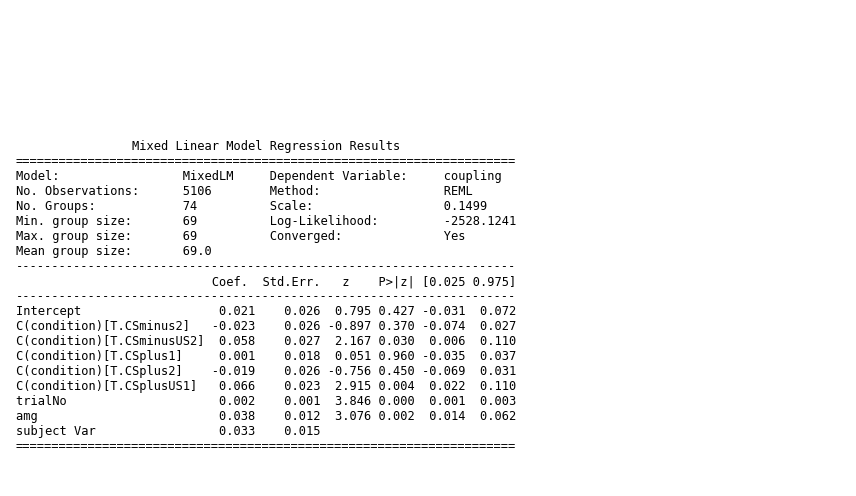

In [44]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model1.summary()), {'fontsize': 12}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

Normality test

In [ ]:
sns.distplot(model1.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = scipy.stats.norm)


In [ ]:
## Q-Q PLot

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(model1.resid, dist = scipy.stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")
labels = ["Statistic", "p-value"]
norm_res = scipy.stats.shapiro(model1.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)

Heteroscedasticity

In [ ]:
sns.scatterplot(y = model1.resid, x = model1.fittedvalues)

In [ ]:
from statsmodels.stats.diagnostic import het_white

het_white_res = het_white(model1.resid, model1.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

In [ ]:
A = np.identity(len(model1.params)) #generate a matrix of the parameters
#A = A[2,:] # take only US
print(A)
model1.f_test(A) #F(1,222)=6.58, p=0.0103
#model1.params

In [ ]:
dfBoth.head()

# Interim Summary
- We have establish that coupling between amg-hipp is associated with CS+US
- Now we need to see how SCR is connected

In [56]:
# grab scr and melt it. 
# model scr as dependent and coupling as predictor (including time, condition and interaction)
#scr = pd.read_csv('firstSCRpart.csv')
scr = pd.read_csv('Behavioral/SCR3.csv')
scr = scr[['sub','Condition','Event.Nr','CDA.AmpSum']]
scr['sub'] = scr['sub'].astype('string')
for i in scr.iterrows():
    if len(i[1]['sub'])<=2:
        #print(i[1]['sub'])
        sub = 'sub-0' + str(i[1]['sub'])
    else:
        sub = 'sub-' + str(i[1]['sub'])
    #print(sub)
    scr.at[i[0], 'sub'] = sub
    

In [57]:
scr['sub'].unique()

<StringArray>
['sub-189', 'sub-086', 'sub-205', 'sub-071', 'sub-087', 'sub-204', 'sub-085',
 'sub-024', 'sub-101', 'sub-100',
 ...
 'sub-124', 'sub-021', 'sub-019', 'sub-010', 'sub-158', 'sub-083', 'sub-113',
 'sub-107', 'sub-126', 'sub-152']
Length: 101, dtype: string

In [58]:
scr['trialNo'] = scr['Event.Nr']
scr['scr'] = scr['CDA.AmpSum']
scr.head()

,sub,Condition,Event.Nr,CDA.AmpSum,trialNo,scr
0,sub-189,CSplusUS1,1,0.2852,1,0.2852
1,sub-189,CSminus1,2,0.1033,2,0.1033
2,sub-189,CSplus1,3,0.0783,3,0.0783
3,sub-189,CSplusUS1,4,0.1772,4,0.1772
4,sub-189,CSminus1,5,0.0000,5,0.0000


In [59]:
dfSCR_coupling = pd.merge(dfBoth, scr, left_on=['subject','trialNo'], right_on=['sub','trialNo'])
dfSCR_coupling.to_csv('dfSCR_coupling.csv', index=False)

In [60]:
len(dfSCR_coupling.subject.unique())

67

In [62]:
glm2 = smf.mixedlm('scr ~ C(condition) + coupling + trialNo+ amg', data=dfSCR_coupling, 
    groups = dfSCR_coupling.subject,
                 missing='drop')
model2 = glm2.fit()
print(model2.summary())

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     scr       
No. Observations:       4621        Method:                 REML      
No. Groups:             67          Scale:                  0.3852    
Min. group size:        68          Log-Likelihood:         -4502.0177
Max. group size:        69          Converged:              Yes       
Mean group size:        69.0                                          
----------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                   0.510    0.065   7.788 0.000  0.382  0.638
C(condition)[T.CSminus2]    0.313    0.043   7.194 0.000  0.228  0.398
C(condition)[T.CSminusUS2]  0.399    0.045   8.871 0.000  0.311  0.487
C(condition)[T.CSplus1]     0.191    0.031   6.164 0.000  0.130  0.252
C(condition)[T.CSplus2]

(0.0, 1.0, 0.0, 1.0)

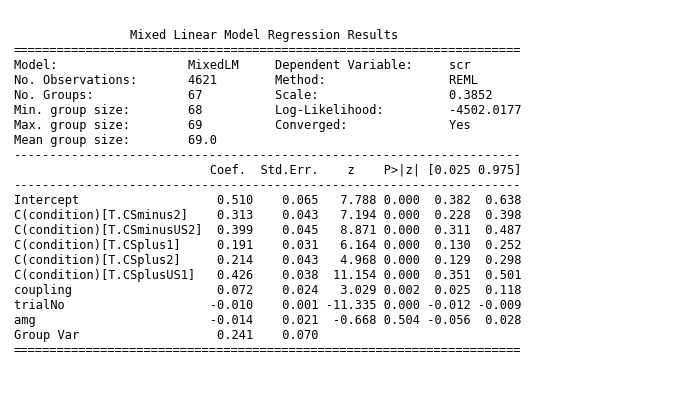

In [67]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model2.summary()), {'fontsize': 12}, fontproperties = 'monospace') 
plt.axis('off')
#plt.tight_layout(pad=0.01)
#plt.savefig('outputSCR_coupling.png', bbox_inches='tight')

In [ ]:
print(model2.params)
B = np.identity(len(model2.params)) #generate a matrix of the parameters
B = B[:,3] # take only coupling
print(B)
print(f'Coupling vs. everything {model2.f_test(B)}') #F(1,2000)=5.69, p=0.017
contCoup_amg = np.array([0,0,0,1,0,0,0,-1,0])
print(f'Coupling vs. amygdala activation {model2.f_test(contCoup_amg)}')

contCoup_cond = np.array([1/3,1/3,1/3,0,-1/2,-1/2,0,0,0])
print(f'F of condition {model2.f_test(contCoup_cond)}')

# interaction = np.array([0,0,0,1/3,1/3,1/3,0,0,0])
# print(f'interaction {model2.f_test(interaction)}')


In [ ]:
2e+03

### Test with vmPFC and other regions
- To make sure the effect is specific to amygdala - hippocampus

In [48]:
# add second stimuli order (B)
def grabCoupling (sub_array, stimList, neuro_array, roi1, roi2):
    length = 8
    subjects = []
    trialNo = []
    condition = []
    coupling = []
    amg = [] # assuming roi1 is amygdala
    for sub,v in enumerate(neuro_array):
           
            for i in stimList.iterrows():
                onset = int(i[1].Time /2)
                #print(onset)
                con = i[1].A
                #print(con)
                subj = sub_array[sub]
                #print(subj)
                trial = i[1].Trial

                #i = int(i)
                a = np.array(v)[onset:onset+length,roi1] 
                b = np.array(v)[onset:onset+length,roi2] 
                coupling.append(scipy.stats.spearmanr(a,b)[0])
                subjects.append(subj)
                condition.append(con)
                trialNo.append(trial)
                if roi1==20: 
                    amg.append(np.mean(a))
                else:
                    print('ROI1 was not defined as amygdala')


    dfCoupl = pd.DataFrame({'subject': subjects, 'trialNo': trialNo,
    'condition': condition, 'coupling': coupling, 'amg': amg})

    dfCoupl_first = dfCoupl#[dfCoupl.trialNo<=30] # take just first half
    return dfCoupl_first
        #distUS_b.append(dist)

In [49]:
df_amg_vmpfc1 = grabCoupling(sub_a, stimList, a_array, 20, 42)
df_amg_vmpfc2 = grabCoupling(sub_a_B, stimList, a_arrayB, 20, 42)

In [50]:
dfBothVMPFC = pd.concat([df_amg_vmpfc1, df_amg_vmpfc2]).reset_index()


In [51]:
glm3 = smf.mixedlm('coupling ~ C(condition) + trialNo + amg', data=dfBothVMPFC, 
    groups = 'subject', 
                 missing='drop')
model3 = glm3.fit()
print(model3.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     coupling  
No. Observations:      5106        Method:                 REML      
No. Groups:            74          Scale:                  0.1216    
Min. group size:       69          Log-Likelihood:         -1977.1953
Max. group size:       69          Converged:              Yes       
Mean group size:       69.0                                          
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   0.386    0.020 18.912 0.000  0.346  0.426
C(condition)[T.CSminus2]    0.032    0.023  1.384 0.166 -0.013  0.078
C(condition)[T.CSminusUS2]  0.001    0.024  0.052 0.958 -0.046  0.048
C(condition)[T.CSplus1]     0.006    0.017  0.366 0.714 -0.026  0.039
C(condition)[T.CSplus2]     0.024   

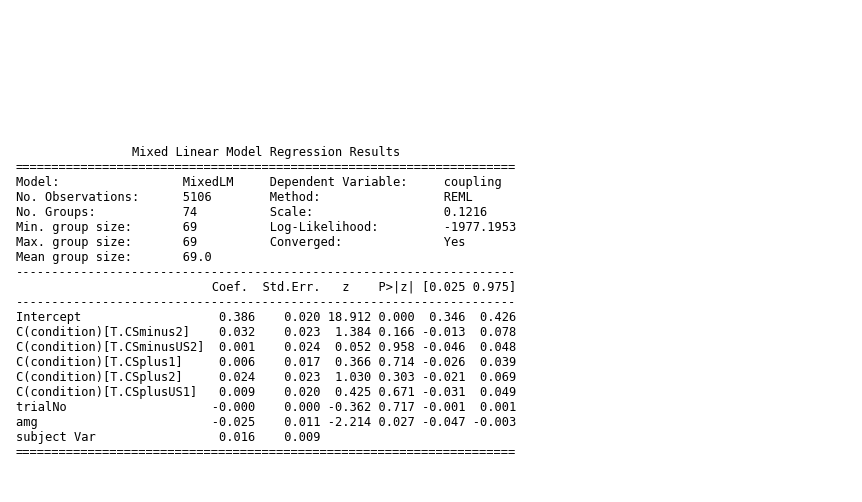

In [54]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model3.summary()), {'fontsize': 12}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout(pad=0.8)
plt.savefig('output_modelVMPFC.png')

# VMPFC - Amygdala
- No effect for condition in the VMPFC - Amygdala coupling

In [ ]:
# scr amg-vmpfc
dfSCR_couplingVMPFC = pd.merge(dfBothVMPFC, scr, left_on=['subject','trialNo'], right_on=['sub','trialNo'])


In [ ]:
glm4 = smf.mixedlm('scr ~ C(condition)*coupling + trialNo + amg', data=dfSCR_couplingVMPFC, 
    groups = 'subject', 
                 missing='drop')
model4 = glm4.fit()
print(model4.summary())

### Control region
- Using Supramarginal Gyrus

In [ ]:
# generate amygdala Supramarginal gyrus anterior LH coupling for each condition in the A timeline
dist_a_amgLC = generateDistDF(a_array, sub_a, us1, csminus, csplus, 20, 250, length = 8) # 250 for Supramarginal gyrus anterior LH
# in the B
dist_b_amgLC = generateDistDF(a_arrayB, sub_a_B, us1_b, csminus_b, csplus_b, 20, 250, length = 8)
df_amg_lc = pd.concat([dist_a_amgLC[0], dist_b_amgLC[0]])
df_amg_lc.groupby('variable').describe()

In [ ]:
df = df_amg_lc.pivot_table(index='subject', columns= 'variable', values= 'value')
sns.pairplot(df[['minus','plus','plusUS']], kind='scatter')



In [ ]:
pg.rm_anova(df_amg_lc, dv='value', within='variable', subject='subject')

In [ ]:
glm = smf.mixedlm('value ~ variable', data=df_amg_lc, groups = df_amg_lc.subject, 
                 missing='drop')
model1 = glm.fit()
print(model1.summary())

## Summary:
- Using spearman (can be pearson) correlation with 8 TR after event (i.e. maximum difference between events):
    1. Amygdala - Hippocampus highly coupled when CS+US compared to other conditions
    2. Amygdala - vmPFC not coupled
    3. Using supramarginal gyrus asr control region- no difference between the conditions in coupling
- These results suggest there's a possibility the amygdala-hippocampus are biomarker of aversive learning.

# Test correlation of amg-hipp coupling with other learning markers
#### Use amg-hipp coupling on CS+ (without US)
- These suppose to be extinction trial

#### Use amg-hipp coupling with amygdala activation

- Not sure its great idea, maybe amygdala activation in CS+ without US

#### Use amg-hipp coupling with SCR

- Here we will take the SCR score in the trial following US (or the actual trial)

In [ ]:
# check cs+US coupling correlation with CS+ coupling in the next trial(s)

# grab CS+US trials amg-hipp r
# grab next trial (CS+ ) amg-hipp r
# run for all subjects
# end with two vectors of r's and correlate them

# first lets mark the cs+us and the consecutive cs+
stimListA = stimList[['Trial', 'A', 'Time']]
# remove cs-
stimListA = stimListA[(stimListA['A']!='CSminus1') & (stimListA['A']!='CSminus2') & (stimListA['A']!='CSplus2')
                     & (stimListA['A']!='CSplusUS2') * (stimListA['A']!='CSminusUS2')]
stimListA
# build vectors of cs+us and cs+
usCoup = np.array([0,48,160,272,368]) / 2
csCoup = np.array([32, 80, 176, 304, 400]) /2

In [ ]:
stimListB = stimList[['Trial', 'B', 'Time']]
# remove cs-
stimListB = stimListB[(stimListB['B']!='CSminus1') & (stimListB['B']!='CSminus2') & (stimListB['B']!='CSplus2')
                     & (stimListB['B']!='CSplusUS2') * (stimListB['B']!='CSminusUS2')]
stimListB
# build vectors of cs+us and cs+
usCoup_b = np.array([0,48,96,160,256,384]) / 2
csCoup_b = np.array([16, 80, 128, 176,304,400]) /2

## Correlation between amg-hipp coupling in CS+US vs. CS+
- Taking only CS+ following the CS+US

In [ ]:
def makeAmgHippCorr(usCoup, csCoup, array):
    corTotal = [] # get correlation between US and CS

    for i in array:#list(range(len(a_array))):
        uscorPerSub = []
        cscorPerSub = []
        for loc in np.arange(len(usCoup)):

            amgUS = i[int(usCoup[loc]):int(usCoup[loc]+8),20]
            hippUS = i[int(usCoup[loc]):int(usCoup[loc]+8),94]
            amgCS = i[int(csCoup[loc]):int(csCoup[loc]+8),20]
            hippCS = i[int(csCoup[loc]):int(csCoup[loc]+8),94]
            uscor = scipy.stats.spearmanr(amgUS,hippUS)[0]
            cscor = scipy.stats.spearmanr(amgCS,hippCS)[0]
            uscorPerSub.append(uscor)
            cscorPerSub.append(cscor)
        #UScorTotal_a.append(uscorPerSub)
        #CScorTotal_a.append(cscorPerSub)
        corTotal.append(scipy.stats.pearsonr(uscorPerSub, cscorPerSub)[0])
    return corTotal
    

In [ ]:
corTotal_a = makeAmgHippCorr(usCoup, csCoup, a_array)
dfCoupling = pd.DataFrame({'subject': sub_a,'cor': corTotal_a})# 'USCor': UScorTotal_a, 'CSCor': CScorTotal_a})

In [ ]:
corTotal_b = makeAmgHippCorr(usCoup_b, csCoup_b, a_arrayB )
dfCoupling_b = pd.DataFrame({'subject': sub_a_B,'cor': corTotal_b})

In [ ]:
dfCoupling_both = pd.concat([dfCoupling, dfCoupling_b])

In [ ]:
dfCoupling1 = pd.merge(dfCoupling_both, dfGroups, left_on='subject', right_on='Sub')
dfCoupling1.groupby('group').describe()


In [ ]:
# simple regression model
simple_reg = smf.ols('cor ~ C(group)', data=dfCoupling1).fit()
print(simple_reg.summary())

In [ ]:
pg.anova(data=dfCoupling1, dv='cor', between='group', detailed=True)

In [ ]:
# plot
#sns.swarmplot(x='group',y='cor', data=dfCoupling1)
sns.barplot(x='group',y='cor', data=dfCoupling1, ci=68)

## Summary
- Interesting difference between the combat controls and PTSD 
- PTSD show higher correlation between coupling of amg-hippocampus in CS+US and CS+
- CC show lower (negative) correlation between the two - fitting extinction
* So - it might show the mechanism in which extinction doesn't work in PTSD?
- Because PTSD and HC are similar, maybe what we see here is some kind of resciliencey by the CC?

## Use Amygdala activation
- Take amygdala activation in the trials following
Here we need to think which exact window of activation do we want (time zero + something? or from time zero?)


In [ ]:
# use the same method to take average amygdala activation during US and CS+ (following US)
# then test correlation between this and amg-hipp coupling on US
corTotal = [] # get correlation between US and CS

for i in a_array:#list(range(len(a_array))):
    uscorPerSub = []
    amgCSarr = []
    amgUSarr = []
    for loc in np.arange(len(usCoup)):

        amgUS = i[int(usCoup[loc]):int(usCoup[loc]+8),20]
        hippUS = i[int(usCoup[loc]):int(usCoup[loc]+8),94]
        amgCS = np.mean(i[int(csCoup[loc]+2):int(csCoup[loc]+4),20]) # taking amygdala activation 4 seconds after and ending with 8 seconds after
        uscor = scipy.stats.spearmanr(amgUS,hippUS)[0]
        cscorAmg = scipy.stats.spearmanr(amgCS,uscor)[0]
        uscorPerSub.append(uscor)
        amgCSarr.append(amgCS)
        amgUSarr.append(amgUS)
    #UScorTotal_a.append(uscorPerSub)
    #CScorTotal_a.append(cscorPerSub)
    corTotal.append(scipy.stats.pearsonr(uscorPerSub, amgCSarr)[0])

In [ ]:
corTotalB = [] # get correlation between US and CS

for i in a_arrayB:#list(range(len(a_array))):
    uscorPerSub = []
    amgCSarr = []
    amgUSarr = []
    for loc in np.arange(len(usCoup)):

        amgUS = i[int(usCoup[loc]):int(usCoup[loc]+8),20]
        hippUS = i[int(usCoup[loc]):int(usCoup[loc]+8),94]
        amgCS = np.mean(i[int(csCoup[loc]+2):int(csCoup[loc]+4),20]) # taking amygdala activation 4 seconds after and ending with 8 seconds after
        uscor = scipy.stats.spearmanr(amgUS,hippUS)[0]
        cscorAmg = scipy.stats.spearmanr(amgCS,uscor)[0]
        uscorPerSub.append(uscor)
        amgCSarr.append(amgCS)
        amgUSarr.append(amgUS)
    #UScorTotal_a.append(uscorPerSub)
    #CScorTotal_a.append(cscorPerSub)
    corTotalB.append(scipy.stats.pearsonr(uscorPerSub, amgCSarr)[0])

In [ ]:
dfCouplingAMG = pd.DataFrame({'subject': sub_a,'cor': corTotal})
dfCouplingAMG_b = pd.DataFrame({'subject': sub_a_B,'cor': corTotalB})
dfCouplingAMG_both = pd.concat([dfCouplingAMG, dfCouplingAMG_b])
dfCouplingAMG_1 = pd.merge(dfCouplingAMG_both, dfGroups, left_on='subject', right_on='Sub')
dfCouplingAMG_1.groupby('group').describe()



In [ ]:
#sns.swarmplot(x='group',y='cor', data=dfCouplingAMG_1)
sns.barplot(x='group',y='cor', data=dfCouplingAMG_1, ci=68)
pg.anova(data=dfCouplingAMG_1, dv='cor', between='group')

In [ ]:
# simple regression model
simple_reg_amgActivation = smf.ols('cor ~ C(group)', data=dfCouplingAMG_1).fit()
print(simple_reg_amgActivation.summary())

## Test amg-hipp coupling with SCR
- First: correlation between mean coupling and CS+ vs. CS- across 1st half
- Following similar method
- Grabbing SCR in the US trials and the ones following

In [ ]:
# read scr file
scr_df = pd.read_csv('plus_minus.csv')
subjs = []
for i,row in scr_df.iterrows():
    sub = 'sub-' + str(row.subject)
    subjs.append(sub)
    
scr_df['subject'] = subjs
scr_df


In [ ]:
# grab only the USplus value
df_amg_plus = df_amg_hipp[df_amg_hipp.variable=='plusUS']
# merge with CS+ vs CS- SCR
df_scr_plusMinus = pd.merge(df_amg_plus, scr_df)
df_scr_plusMinus.groupby('group').corr()

pg.corr(df_scr_plusMinus.value, df_scr_plusMinus.plusMinus)

In [ ]:
reg_amgHipp_scr = smf.rlm('plusMinus ~ C(group) * value', data=df_scr_plusMinus).fit()
reg_amgHipp_scr.summary()

In [ ]:
sns.lmplot(data=df_scr_plusMinus[df_scr_plusMinus.group!='HC'], x='plusMinus', y='value', hue='group')

## just Second half of first part

In [ ]:
scr_s = pd.read_csv('plus_minus_2.csv')
subjs = []
for i,row in scr_s.iterrows():
    sub = 'sub-' + str(row.subject)
    subjs.append(sub)
    
scr_s['subject'] = subjs

df_scr_plusMinus = pd.merge(df_amg_plus, scr_s)
df_scr_plusMinus
df_scr_plusMinus.groupby('group').corr()
pg.corr(df_scr_plusMinus.value, df_scr_plusMinus.plusMinus)

In [ ]:
# Grab SCR data
scrDat = pd.read_csv('Behavioral/SCR3.csv', dtype= {'sub': 'string'} )
scrDat = scrDat[['sub','Event.Nr','CDA.PhasicMax', 'Condition']]
# add sub to subject
for i in scrDat.iterrows():
    subNum = scrDat.at[i[0], 'sub']
    if len(subNum) < 2:
        sub = 'sub-' + '00' + subNum
       # print(sub)
    elif len(subNum) ==2:
        sub = 'sub-' + '0' + subNum
       # print(sub)
    else:
        sub = 'sub-' + subNum
    scrDat.at[i[0], 'sub'] = sub


In [ ]:
# take just 1st part
scrDat = scrDat[(scrDat['Condition']!='CSminus1') & (scrDat['Condition']!='CSminus2') & 
                (scrDat['Condition']!='CSplus2')
                     & (scrDat['Condition']!='CSplusUS2') * (scrDat['Condition']!='CSminusUS2')]

In [ ]:
scrSub = scrDat['sub'].unique() # grab scr subject list
scrSub = np.array(scrSub)

In [ ]:
scrSubs = set(sub_a).intersection(scrSub) # find intersection between both lists
scrSubs_b = set(sub_a_B).intersection(scrSub)
len(scrSubs)

In [ ]:
# grab each subject's scr data (only relevant one)
scr_relevant = {}
for sub in scrSubs:
    print(sub)
    scSub = scrDat[scrDat['sub']==sub]
    scSub = scSub[['sub','CDA.PhasicMax','Condition']]
   # print(scSub)
    # now grab phasicmax after US
    scr_us = [] # empty holder for list of phasicmax per subject
    csTick=0 ## set ticker for CSplusUS conditions
    for i in scSub.iterrows():
        if csTick==1: # if it was previously CSplusUS1
            # specific case when consecutive USs are in 
            if i[1]['Condition']!= 'CSplusUS1':
                print(i[1]['Condition'])
                scr_us.append(i[1]['CDA.PhasicMax'])
            else:
                csTick=1
        else:
            print('previous non US trial')
        if i[1]['Condition']=='CSplusUS1':
            csTick = 1
        else:
            csTick=0
            print('Not US trial')
        
    scr_relevant[sub] = scr_us
    

In [ ]:
scr_relevant_b = {}
for sub in scrSubs_b:
    print(sub)
    scSub = scrDat[scrDat['sub']==sub]
    scSub = scSub[['sub','CDA.PhasicMax','Condition']]
   # print(scSub)
    # now grab phasicmax after US
    scr_us = [] # empty holder for list of phasicmax per subject
    csTick=0 ## set ticker for CSplusUS conditions
    for i in scSub.iterrows():
        if csTick==1: # if it was previously CSplusUS1
            # specific case when consecutive USs are in 
            if i[1]['Condition']!= 'CSplusUS1':
                print(i[1]['Condition'])
                scr_us.append(i[1]['CDA.PhasicMax'])
            else:
                csTick=1
        else:
            print('previous non US trial')
        if i[1]['Condition']=='CSplusUS1':
            csTick = 1
        else:
            csTick=0
            print('Not US trial')
        
    scr_relevant_b[sub] = scr_us

In [ ]:
## now I can take that and correlate with amygdala-hippocampus coupling
corTotal = {} # get correlation between US and CS

for i,sub in zip(a_array, sub_a):#list(range(len(a_array))):
    
    uscorPerSub = []
    for loc in np.arange(len(usCoup)):

        amgUS = i[int(usCoup[loc]):int(usCoup[loc]+8),20]
        hippUS = i[int(usCoup[loc]):int(usCoup[loc]+8),94]
        uscor = scipy.stats.pearsonr(amgUS,hippUS)[0]
        uscorPerSub.append(uscor)
       
    corTotal[sub]=np.array(uscorPerSub)

In [ ]:
## now I can take that and correlate with amygdala-hippocampus coupling
corTotal_B = {} # get correlation between US and CS

for i,sub in zip(a_arrayB, sub_a_B):#list(range(len(a_array))):
    
    uscorPerSub = []
    for loc in np.arange(len(usCoup_b)):

        amgUS = i[int(usCoup_b[loc]):int(usCoup_b[loc]+8),20]
        hippUS = i[int(usCoup_b[loc]):int(usCoup_b[loc]+8),94]
        uscor = scipy.stats.pearsonr(amgUS,hippUS)[0]
        uscorPerSub.append(uscor)
       
    corTotal_B[sub]=np.array(uscorPerSub)

In [ ]:
scrBrain_cor = {}
for sub in scrSubs:
    amgHipp = corTotal[sub] # grab amygdala hippocampus coupling
    # grab scr
    scrGrab = scr_relevant[sub]
    scrAmgHipp_correlation = scipy.stats.spearmanr(amgHipp, scrGrab)[0]
    scrBrain_cor[sub] = scrAmgHipp_correlation

In [ ]:
scrBrain_cor_b = {}
for sub in scrSubs_b:
    amgHipp = corTotal_B[sub] # grab amygdala hippocampus coupling
    # grab scr
    scrGrab = scr_relevant_b[sub]
    scrAmgHipp_correlation = scipy.stats.spearmanr(amgHipp, scrGrab)[0]
    scrBrain_cor_b[sub] = scrAmgHipp_correlation

In [ ]:
values = scrBrain_cor.items()
scrBrain_cor1 = pd.DataFrame(values, columns=['subject','scrCor'])
values_b = scrBrain_cor_b.items()
scrBrain_cor1_b = pd.DataFrame(values_b, columns=['subject','scrCor'])
scrBrain_both = pd.concat([scrBrain_cor1, scrBrain_cor1_b])
scrBrain_cor1 = pd.merge(scrBrain_both, dfGroups, left_on='subject', right_on='Sub')
scrBrain_cor1.groupby('group').describe()

In [ ]:
pg.anova(scrBrain_cor1, between='group', dv='scrCor')

Nothing. But should try a different approach, correlating all subjects (or just from each group) with each trial

In [ ]:
# simple regression model
simple_reg_scr = smf.ols('scrCor ~ C(group)', data=scrBrain_cor1).fit()
print(simple_reg_scr.summary())

### Different approach  of SCR
- Correlate each trial (i.e. all subjects/one group)

In [ ]:

## now I can take that and correlate with amygdala-hippocampus coupling
corTotal = {} # get correlation between US and CS

for loc in np.arange(len(usCoup)):
    uscorPerTrial = []
    for i,sub in zip(a_array, sub_a):#list(range(len(a_array))):
        
        amgUS = i[int(usCoup[loc]):int(usCoup[loc]+8),20]
        hippUS = i[int(usCoup[loc]):int(usCoup[loc]+8),94]
        uscor = scipy.stats.pearsonr(amgUS,hippUS)[0]
        uscorPerTrial.append(uscor)
       
    corTotal[str(loc)]=np.array(uscorPerTrial)

In [ ]:
## now I can take that and correlate with amygdala-hippocampus coupling
corTotal_B = {} # get correlation between US and CS

for loc in np.arange(len(usCoup_b)):
    uscorPerTrial = []
    for i,sub in zip(a_arrayB, sub_a_B):#list(range(len(a_array))):
        
        amgUS = i[int(usCoup_b[loc]):int(usCoup_b[loc]+8),20]
        hippUS = i[int(usCoup_b[loc]):int(usCoup_b[loc]+8),94]
        uscor = scipy.stats.pearsonr(amgUS,hippUS)[0]
        uscorPerTrial.append(uscor)
       
    corTotal_B[str(loc)]=np.array(uscorPerTrial)

In [ ]:
scr_relevantDf = pd.DataFrame(scr_relevant).T
scr_relevantDf.columns = ['SCR1', 'SCR2','SCR3','SCR4','SCR5']
corTotal_Df = pd.DataFrame(corTotal)

corTotal_Df['subject'] = sub_a
#scr_relevantDf
corTotal_Df.columns = ['Trial1','Trial2','Trial3','Trial4', 'Trial5', 'subject']


In [ ]:
scr_relevantDf_b = pd.DataFrame(scr_relevant_b).T
corTotal_Df_b = pd.DataFrame(corTotal_B)


corTotal_Df_b['subject'] = sub_a_B
#scr_relevantDf
corTotal_Df_b.columns = ['Trial1','Trial2','Trial3','Trial4', 'Trial5', 'Trial6', 'subject']
scr_relevantDf_b.columns = ['SCR1', 'SCR2','SCR3','SCR4','SCR5', 'SCR6']

In [ ]:
scr_relevant_DF1 = scr_relevantDf.merge(corTotal_Df, right_on='subject', left_index=True)

In [ ]:
scr_relevant_DF2 = scr_relevantDf_b.merge(corTotal_Df_b, right_on='subject', left_index=True)

In [ ]:
corTotalBoth = pd.concat([scr_relevant_DF1, scr_relevant_DF2], join='outer')
sns.heatmap(corTotalBoth.corr(), cmap='coolwarm', vmin = -1)

## Different groups

In [ ]:
corTotalBoth = pd.merge(corTotalBoth, dfGroups, left_on='subject', right_on='Sub')
corTotalBoth.head()

In [ ]:
sns.heatmap(corTotalBoth[corTotalBoth.group=='VPTSD'].corr(), cmap='coolwarm', vmin = -1)

In [ ]:
sns.heatmap(corTotalBoth[corTotalBoth.group=='VCC'].corr(), cmap='coolwarm', vmin = -1)

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corTotalBoth[corTotalBoth.group=='HC'].corr(), cmap='coolwarm', vmin = -1,
           annot=True)

In [ ]:
## Take Trial1 - SCR1 etc.
totalCor = corTotalBoth.corr()
# grab relevant correlations
trials = ['Trial1','Trial2','Trial3','Trial4', 'Trial5', 'Trial6']
scrs = ['SCR1', 'SCR2','SCR3','SCR4','SCR5', 'SCR6']

allCor = []
for t, s in zip(trials, scrs):
    print(t , s)
    allCor.append(totalCor.at[t, s])

In [ ]:
# same for PTSD
## Take Trial1 - SCR1 etc.
totalCor = corTotalBoth[corTotalBoth.group=='VPTSD'].corr()
# grab relevant correlations
trials = ['Trial1','Trial2','Trial3','Trial4', 'Trial5', 'Trial6']
scrs = ['SCR1', 'SCR2','SCR3','SCR4','SCR5', 'SCR6']

allCorPT = []
for t, s in zip(trials, scrs):
    #print(t , s)
    allCorPT.append(totalCor.at[t, s])

In [ ]:
# same for VCC
## Take Trial1 - SCR1 etc.
totalCor = corTotalBoth[corTotalBoth.group=='VCC'].corr()
# grab relevant correlations
trials = ['Trial1','Trial2','Trial3','Trial4', 'Trial5', 'Trial6']
scrs = ['SCR1', 'SCR2','SCR3','SCR4','SCR5', 'SCR6']

allCorCC = []
for t, s in zip(trials, scrs):
   # print(t , s)
    allCorCC.append(totalCor.at[t, s])

In [ ]:
# same for HC
## Take Trial1 - SCR1 etc.
totalCor = corTotalBoth[corTotalBoth.group=='HC'].corr()
# grab relevant correlations
trials = ['Trial1','Trial2','Trial3','Trial4', 'Trial5', 'Trial6']
scrs = ['SCR1', 'SCR2','SCR3','SCR4','SCR5', 'SCR6']

allCorHC = []
for t, s in zip(trials, scrs):
    #print(t , s)
    allCorHC.append(totalCor.at[t, s])

In [ ]:
print(f'PTSD {allCorPT}')
print(f'HC {allCorHC}')
print(f'CC {allCorCC}')

Doesn't look interesting

1. Is correlation is indicator of learning
2. Uncoupling as predictor for extinction
Ifat - Try to use alpha with average coupling